In [124]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [125]:
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [126]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [127]:
!kaggle datasets download -d anthonypino/melbourne-housing-market

melbourne-housing-market.zip: Skipping, found more recently modified local copy (use --force to force download)


In [128]:
#!unzip \*.zip && rm *.zip

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [131]:
print(f'Format:         {df.shape}\n'
      f'Eleman Sayisi:  {df.size}\n'
      f'Boyut:          {df.ndim}\n')

Format:         (34857, 21)
Eleman Sayisi:  731997
Boyut:          2



In [132]:
df.info()       #Verimizin özellikleri

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [133]:
df.isnull().sum()   #Kaç adet null değer içeren sütunumuz var

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [134]:
df.nunique()        #Benzersiz olmayan kaç adet verimiz olduğuna bakıyoruz. Bunları kategorik -> numerik değişimi için kullanıcaz

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


## Görselleştirme

Verilerin aralarında ki kolerasyon değerleri bakıcaz. Bu sayede bazı kolonları düşürebiliriz (Bedroom2). Aynı zamanda bölgelere göre toplam ev fiyatlarına, ortalama ev fiyatına ve ev sayısına bakıcaz. Bu sayede bölgeleri LabelEncoder ile numerik değerlere dönüştüreceğiz.

(Ortalama ev fiyatı en pahallı olan bölgeler diğerlerine göre daha elit mahalle olabilir)

<ipython-input-136-cc883d1fa842>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'Blues', annot = True)#Aralarında ilişki olan kolanlara bakıcaz. Buna göre bazı kolonları düşürücez


<Axes: >

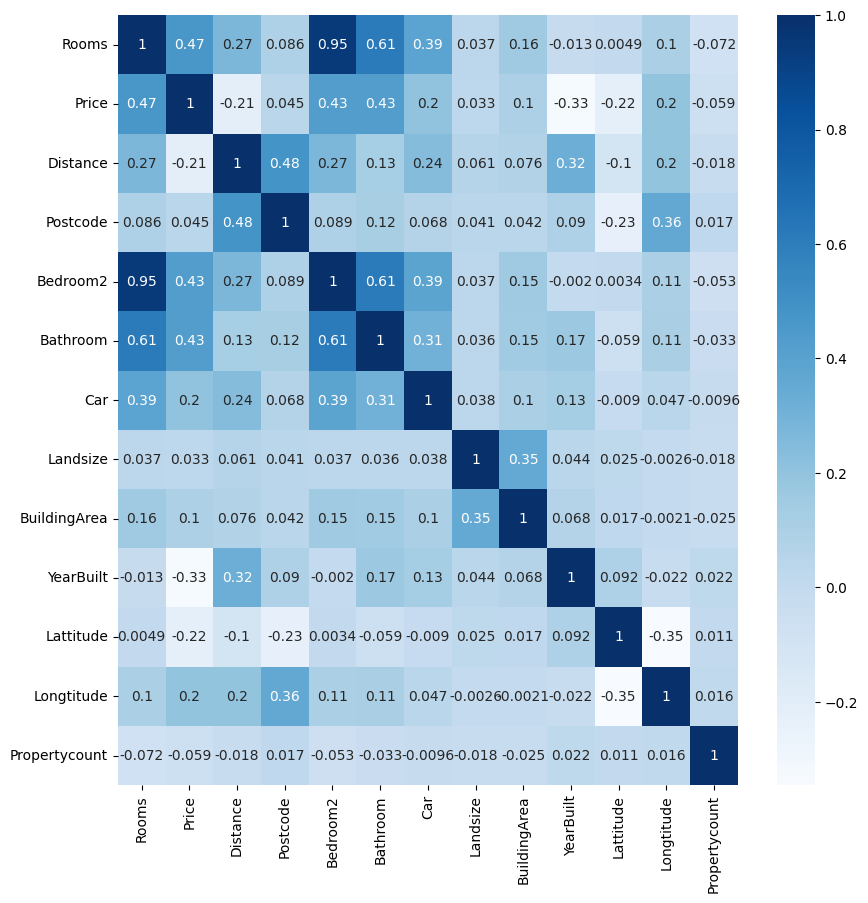

In [136]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)#Aralarında ilişki olan kolanlara bakıcaz. Buna göre bazı kolonları düşürücez

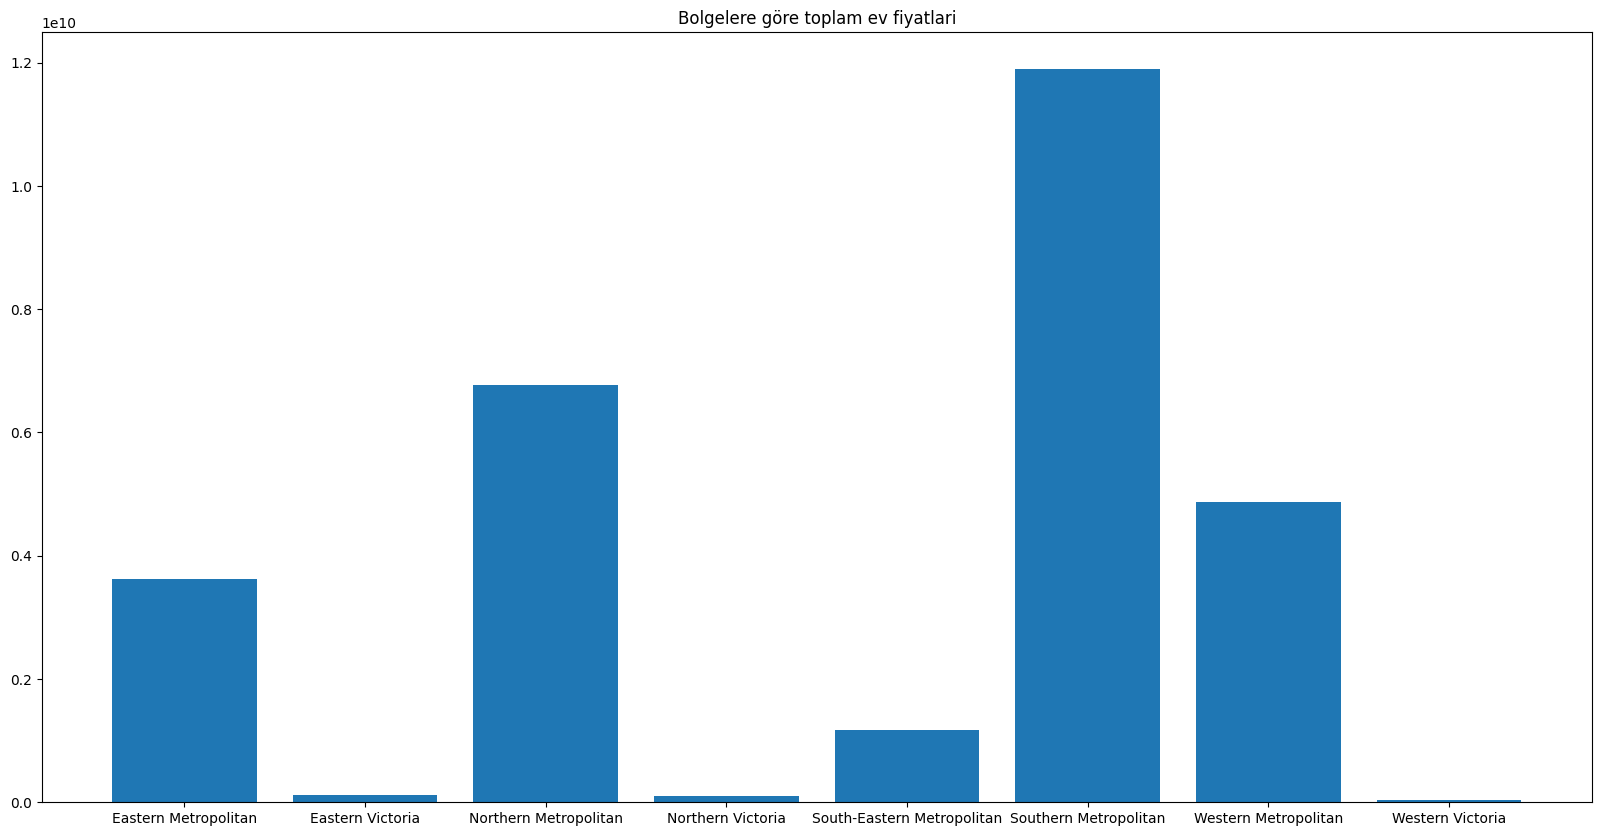

In [137]:
#Bolgelere göre toplam ev fiyatı


toplam_fiyatlar = df.groupby('Regionname')['Price'].sum().reset_index()

plt.figure(figsize=(20,10))
plt.bar(toplam_fiyatlar['Regionname'],toplam_fiyatlar['Price'])
plt.title('Bolgelere göre toplam ev fiyatlari')
plt.show()

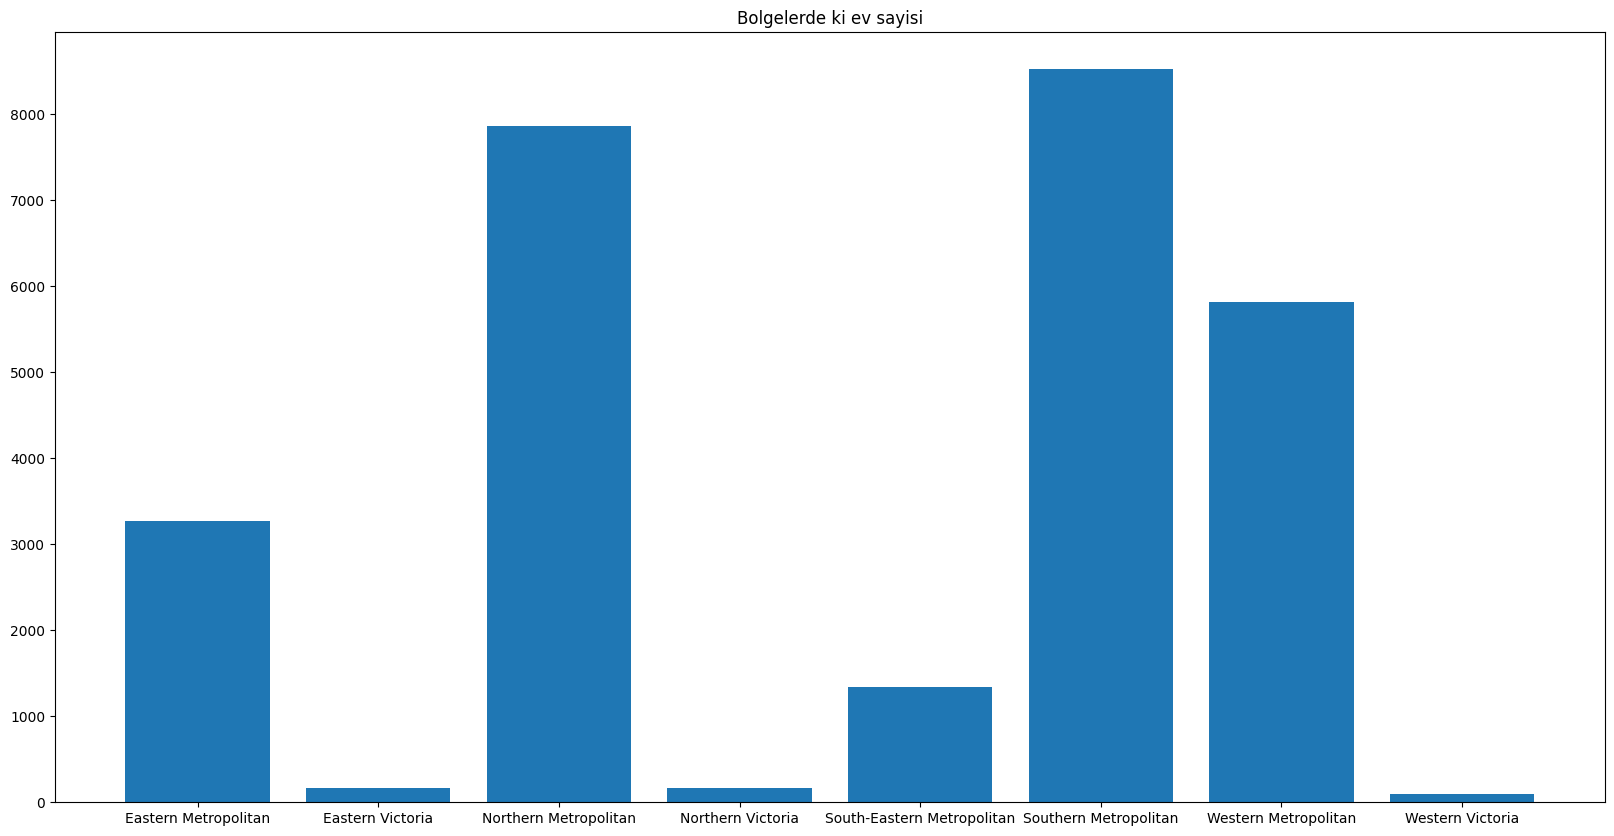

In [138]:
#Bölgelere göre toplam ev sayısı

toplam_ev = df.groupby('Regionname')['Price'].count().reset_index()

plt.figure(figsize=(20,10))
plt.bar(toplam_ev['Regionname'],toplam_ev['Price'])
plt.title('Bolgelerde ki ev sayisi')
plt.show()

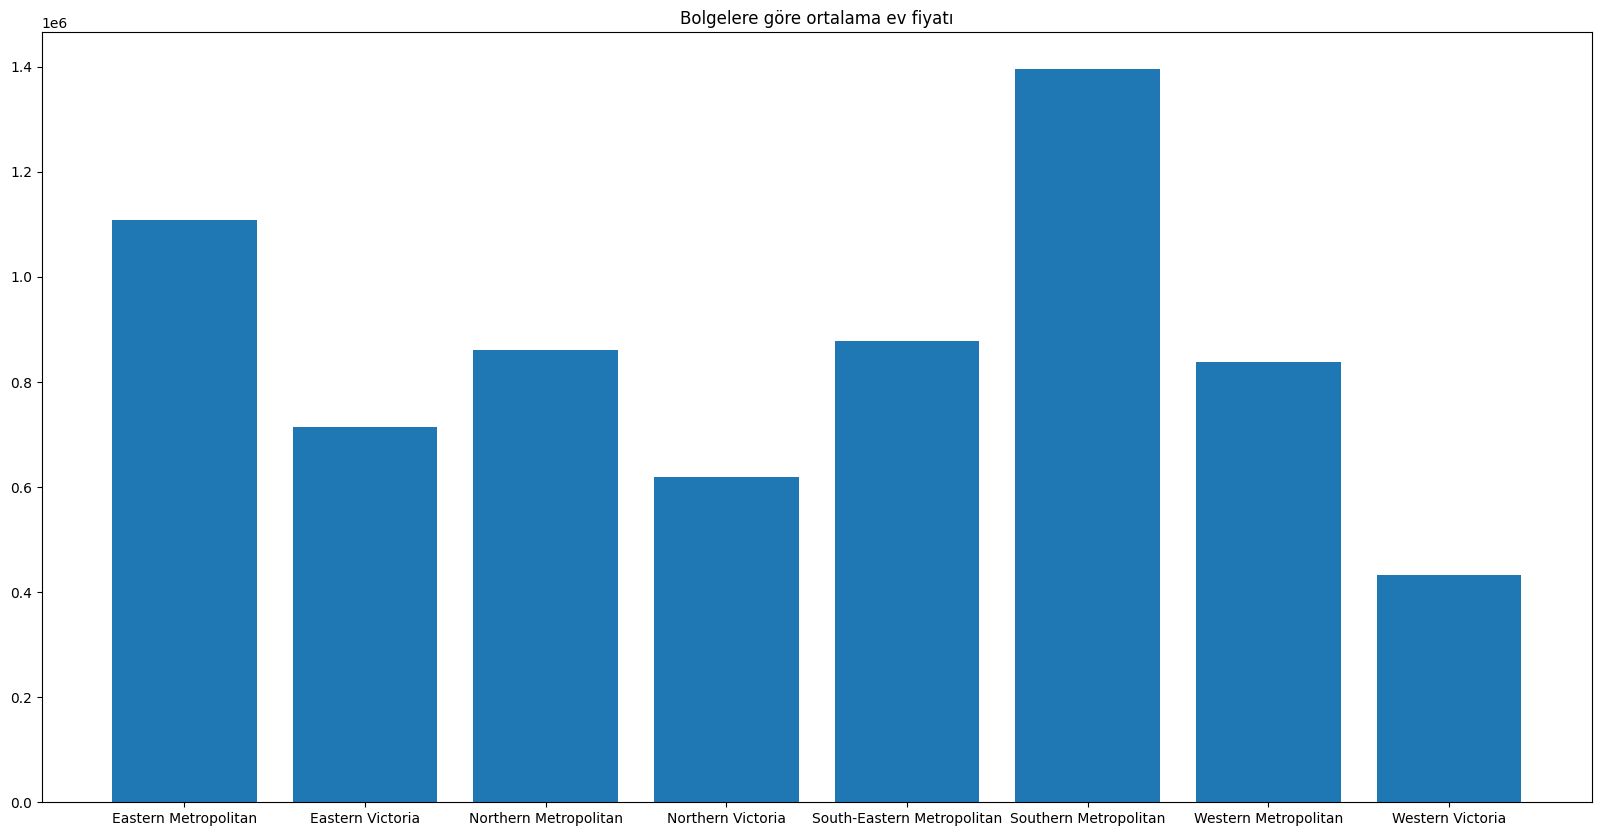

In [139]:
#Bölgelere göre ort ev fiyatı

ort_fiyat = df.groupby('Regionname')['Price'].mean().reset_index()

plt.figure(figsize=(20,10))
plt.bar(ort_fiyat['Regionname'],ort_fiyat['Price'])
plt.title('Bolgelere göre ortalama ev fiyatı')
plt.show()

In [140]:
# Yukarıda ki grafikleştirmelerden en değerli evlerin Southern Metropolitanda en değersiz evlerin Western Victoria da olduğunu anlıyoruz.

etiket_sirasi = ['Southern Metropolitan','Eastern Metropolitan', 'South-Eastern Metropolitan','Northern Metropolitan','Western Metropolitan','Eastern Victoria','Northern Victoria','Western Victoria'][::-1]

## Birebir aynı olan verileri kaldırma

In [141]:
df.drop_duplicates(inplace= True)

df.duplicated().sum()



0

In [142]:
#Yapım yılı yanlış olan bi veriyi düşürme

df.drop(index = 2453, axis = 0, inplace= True)

In [143]:
# Az miktarda null değer içeren sütunları düşürme


df.dropna(subset = ['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount'], axis = 0, inplace = True)

In [144]:
#kategorik ve sayısal olan kolonları görme

categorical_columns = df.select_dtypes(include=['object'])
numeric_columns = df.select_dtypes(include=['int', 'float'])

print(f"Kategorik Kolonlar:{categorical_columns.columns.to_list()}\n" )
print(f"Sayisal Kolonlar: {numeric_columns.columns.to_list()}")

Kategorik Kolonlar:['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

Sayisal Kolonlar: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


## Kayip verileri doldurma

Ortalama veya en fazla tekrar eden değere göre doldurduk

In [145]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy= 'mean')


#Missing değer içeren kolonlar
missingKolon = [
    'Price',
    'Bathroom',
    'Car',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    'Lattitude',
    'Longtitude'
]


for kolonAdi in missingKolon:

    #Bathroom,car ve yapım yılı gibi kolonlarda en çok tekrar eden veri ile doldurma yaptık
    if kolonAdi == 'Bathroom' or kolonAdi == 'Car' or kolonAdi == 'YearBuilt':
        imp.strategy = 'most_frequent'
        yeniVeriler = imp.fit_transform(df[kolonAdi].values.reshape(-1,1))
        df[kolonAdi] = yeniVeriler

    #Geriye kalan diğer verilerde ise ortalama ile doldurma yaptık
    else:
        imp.strategy = 'mean'
        yeniVeriler = imp.fit_transform(df[kolonAdi].values.reshape(-1,1))
        df[kolonAdi] = yeniVeriler



In [146]:
# null değer içeren kolonumuz var mı diye kontrol ediyoruz.

df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         8214
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## Aykırı değerleri temizleme

Öncelikle aykırı değerlerimizi box grafiği ile görselleştiriyoruz

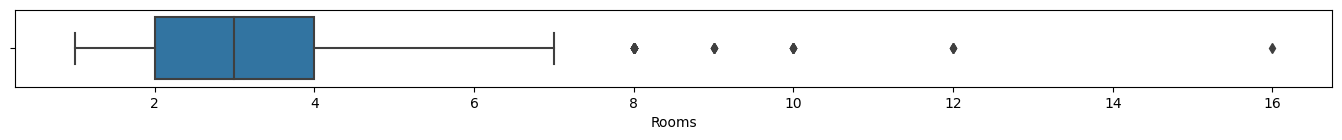

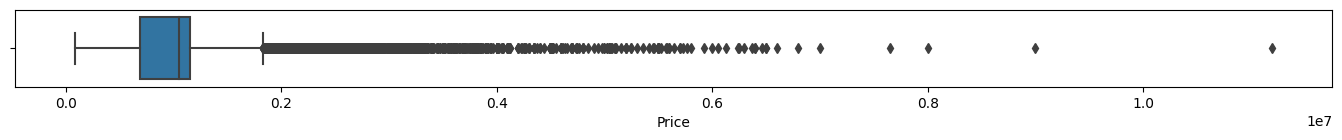

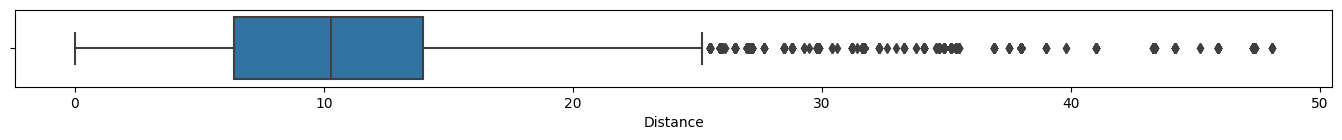

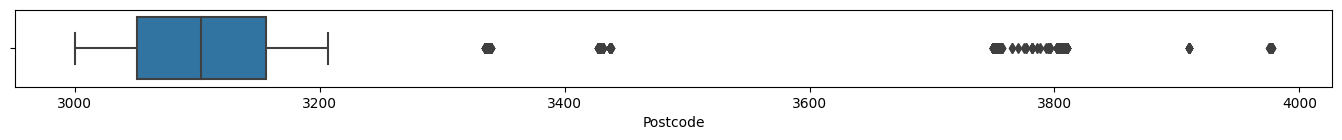

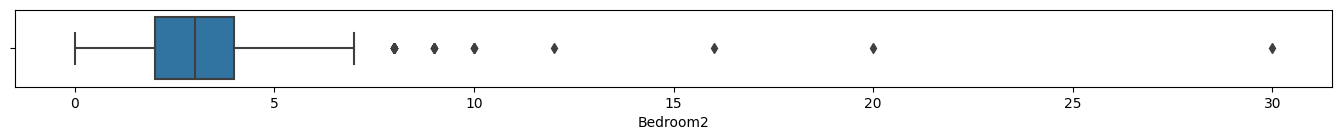

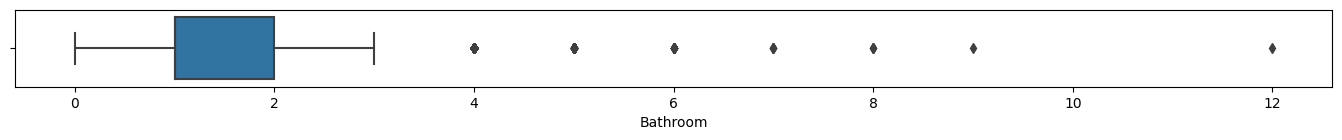

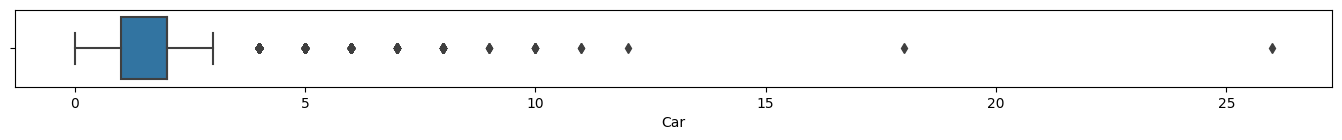

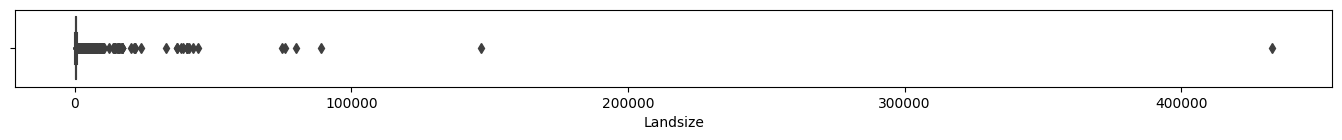

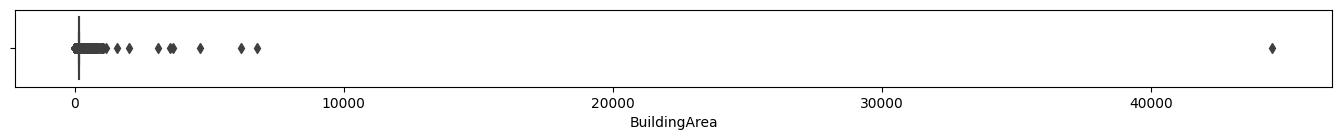

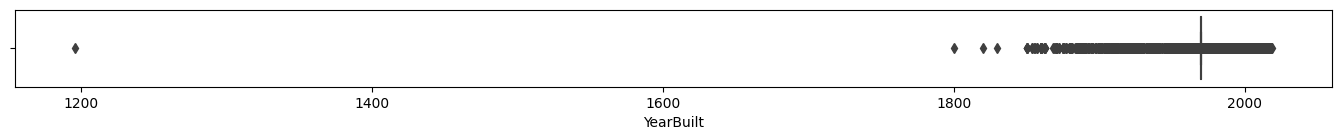

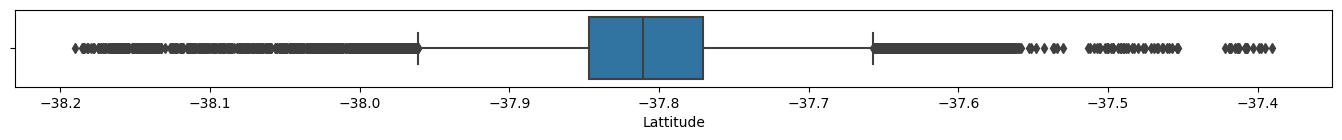

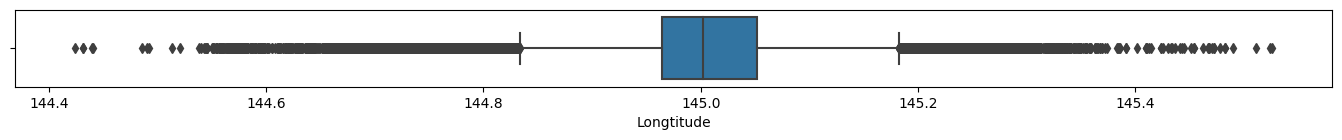

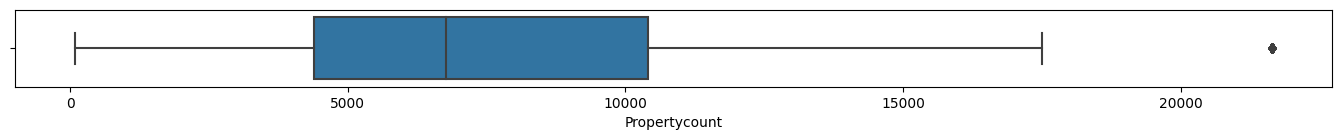

In [147]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(17,1))
    gfg = sns.boxplot(data = df, x = column)

In [148]:
"""
Aykırı değerlerimizi tespit edip bu değerleri upLimit ya da lowLimite eşitleyen fonksiyonumuz.
Treshold değerine göre ne kadar veriyi tıraşlıcağı değişiklik gösterir. Treshold değeri düştükçe daha fazla değeri tıraşlar.
Yaygın olarak 3 değeri kullanılır fakat ben daha fazla aykırı değeri düzenlemek için 2 seçtim
"""

def z_Score(df, kolonListesi):

    df_copy = df.copy()

    for kolonAdi in kolonListesi:
        mean = np.mean(df_copy[kolonAdi])
        std = np.std(df_copy[kolonAdi])

        #Coğunlukla treshold 3 seçilir fakat 2 değerini kullanmak bu örnekte daha başarılı sonuçlar almamızı sağlıyor
        treshold = 2

        upLimit = mean + treshold * std
        lowLimit = mean - treshold * std

        df_copy['zScore_' + kolonAdi] = ((df_copy[kolonAdi] - mean) / std).astype(float)
        df_copy[kolonAdi] = np.where(df_copy['zScore_' + kolonAdi] > treshold, upLimit, np.where(df_copy['zScore_' + kolonAdi] < (-1) * treshold, lowLimit, df_copy[kolonAdi]))

        df_copy.drop('zScore_' + kolonAdi, axis = 1, inplace = True)


    return df_copy




#Aykırı değerlerin tespit ediliceği kolon listesi
kolonListesi = [
    'Rooms',
    'Price',
    'Distance',
    'Lattitude',
    'Longtitude',
    'Propertycount',
    'Landsize',
    'BuildingArea'
]


df = z_Score(df, kolonListesi)

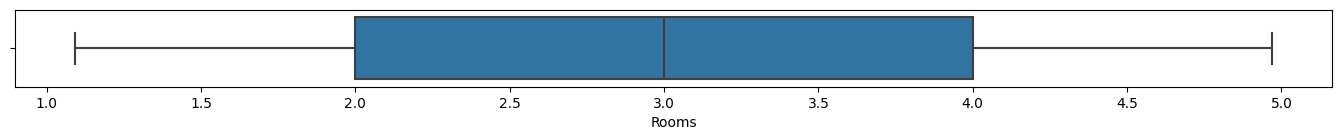

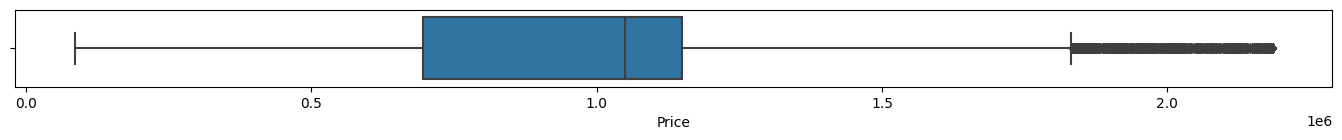

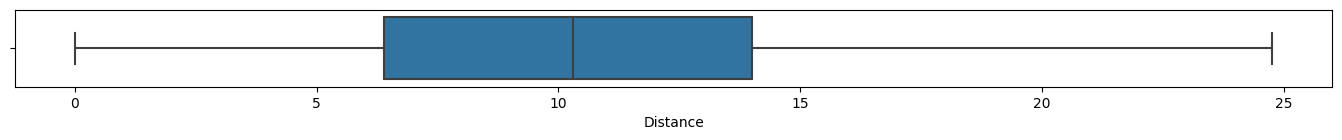

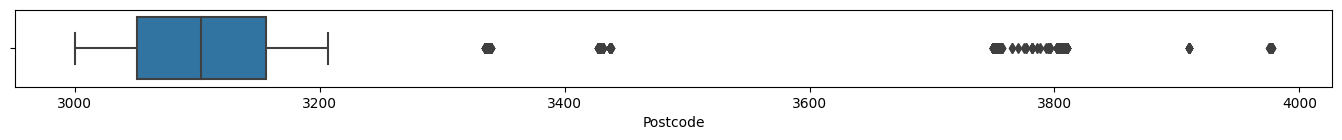

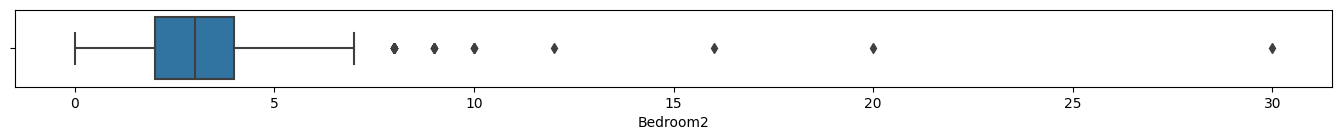

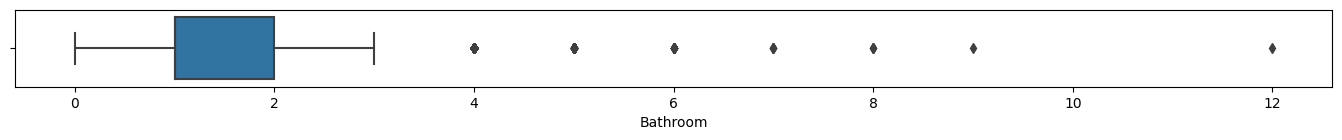

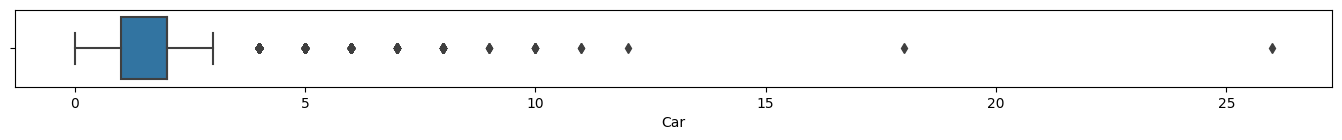

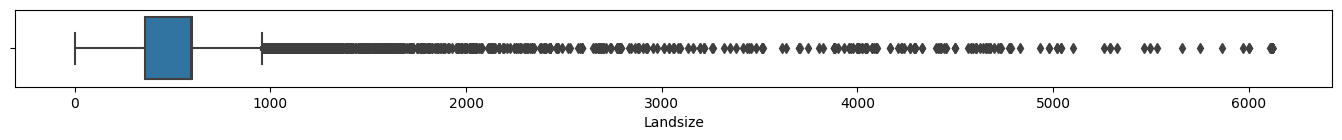

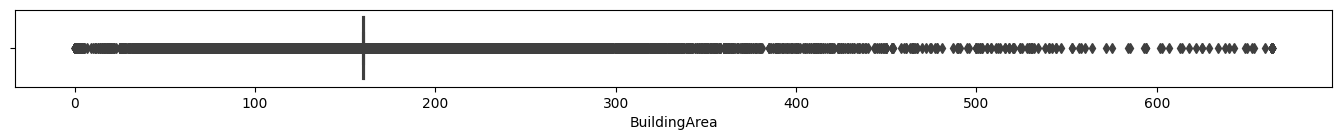

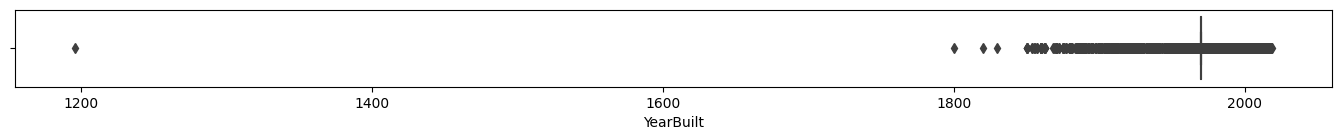

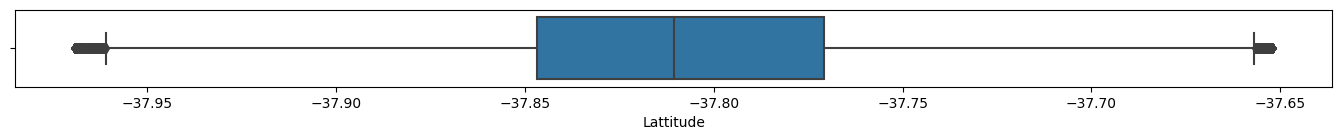

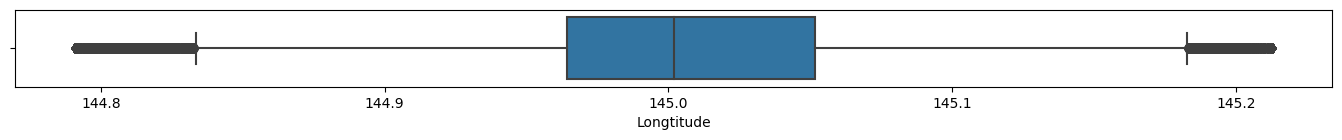

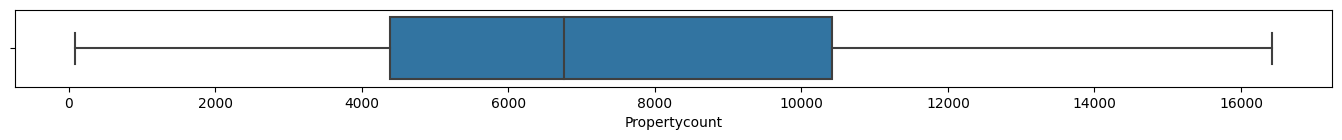

In [149]:
#Tekrardan görselleştirme yapma ve aykırı değerleri azalmış mı diye kontrol ediyoruz

for column in df.select_dtypes(include=['number']).columns[0: 13]:
    plt.figure(figsize=(17,1))
    gfg = sns.boxplot(data = df, x = column)

## Encoding işlemi

Kategorik değerleri numerik değerlere çevirme.

In [150]:
from sklearn.preprocessing import LabelEncoder


# one-hot-encoder

ohe = pd.get_dummies(df, prefix = 'Dummy_' , columns= ['Suburb','Type', 'Method', 'SellerG', 'CouncilArea'])
df = ohe.copy()

# label encoder
label_encoder = LabelEncoder()
df['Regionname'] = label_encoder.fit(etiket_sirasi).transform(df['Regionname'])
#df['Suburb'] = label_encoder.fit_transform(df['Suburb'])



In [151]:
# Veriyi işleme


#Adres satırını düzenleme
df['Date'] = pd.to_datetime(df['Date'], dayfirst= True)

df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

#Bazı kolonları kaldırma
df.drop(columns= ['Address', 'Bedroom2', 'Date'], axis = 1, inplace = True)

## Veriyi bölme

In [152]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis = 1).values
y = df['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.33, random_state= 0)

## Normalleştirme yapma

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelleri import etme

In [154]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor


models = {'XGB': XGBRegressor(max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
          'Lasso': Lasso(),
          'LinearRegression': LinearRegression(),
          'Ridge': Ridge(),
          'ElasticNet': ElasticNet(),
          'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=10),
          'RandomForestRegressor': RandomForestRegressor(),
          'GradientBoostingRegressor': GradientBoostingRegressor(),
          'AdaBoostRegressor': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
         }


## Modelleri sırasıyla çalıştırma ve başarı oranlarını hesaplama

In [155]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import median_absolute_error, r2_score


for modelAdi, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model Adi:", modelAdi)
    print("R-Kare: ", r2_score(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("MSE: ", mean_squared_error(y_test, y_pred))
    print("MedAE: ", median_absolute_error(y_test, y_pred))
    print("EVS: ", explained_variance_score(y_test, y_pred), end = '\n\n')


Model Adi: XGB
R-Kare:  0.6516980701942102
MAE:  189302.9557796682
MSE:  66943459991.59757
MedAE:  135993.04616612836
EVS:  0.6517379107297895



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.814e+14, tolerance: 4.503e+11
  model = cd_fast.enet_coordinate_descent(


Model Adi: Lasso
R-Kare:  0.5654441451336117
MAE:  221464.49893072637
MSE:  83521422062.12654
MedAE:  172230.90296926076
EVS:  0.5655532535350154

Model Adi: LinearRegression
R-Kare:  -1.299543418960421e+25
MAE:  4.99636182934625e+16
MSE:  2.497716074183943e+36
MedAE:  176237.2456044237
EVS:  -1.2995298099336838e+25

Model Adi: Ridge
R-Kare:  0.5656812222511622
MAE:  221399.6370676395
MSE:  83475855956.4707
MedAE:  172196.2475666069
EVS:  0.5657885255440412

Model Adi: ElasticNet
R-Kare:  0.547782680588698
MAE:  228025.03812802065
MSE:  86915946880.90865
MedAE:  183561.51176467986
EVS:  0.547912900792513

Model Adi: KNeighborsRegressor
R-Kare:  0.45297799305713393
MAE:  245161.19357191224
MSE:  105137361302.36751
MedAE:  187592.00653354864
EVS:  0.4544635175178975

Model Adi: RandomForestRegressor
R-Kare:  0.6371274070717028
MAE:  188480.4281198113
MSE:  69743934293.69662
MedAE:  131650.44901183114
EVS:  0.6372672499941539

Model Adi: GradientBoostingRegressor
R-Kare:  0.60291292884216